# Largest hotels

In [1]:
import sys
sys.path.append("../")
from src import utils, config, api_calls

In [2]:
import pandas as pd

In [3]:
df_accomms = pd.read_csv(config.PREPARED_ACCOMM_FILE)

In [4]:
df_accomms.loc[~df_accomms.Name.str.lower().str.contains("camping")].sort_values(by="MaxOccupancy", ascending=False).head(10)

,Name,City,AccoCategoryId,AccoRoomInfo,HasApartment,IsGastronomy,LocationInfo,Altitude,Latitude,Longitude,Id,file,TotalRooms,MaxOccupancy
3319,Gourmet Hotel Gran Ander,Badia,3sstars,5.0,False,False,Dolomitenregion Alta Badia,1324.0,46.608900,11.893300,4F823F3C330F11D4B52E0050DA6D2951,data/raw_data/page_427.json,24.0,2279.0
5900,Area Camper Ritterkeller,St. Vigil in Enneberg,1star,2.0,False,False,Dolomitenregion San Vigilio,1201.0,46.706205,11.928835,C09C695D739299FC7F29DF580E6D5199,data/raw_data/page_188.json,240.0,1920.0
5779,Residence Boè,St. Christina - Gröden,2stars,3.0,True,False,Dolomitenregion Gröden,1428.0,46.559900,11.715600,C0DF8F1F76D911D18F2900A02427D15E,data/raw_data/page_777.json,262.0,1251.0
6257,Hotel Winterlehof,Villanders,2stars,1.0,False,False,Brixen und Umgebung,950.0,46.624751,11.504349,8A0630CD573711D4BEFB0050DA3A0062,data/raw_data/page_598.json,25.0,1250.0
5949,GOLD EXPERIENCE,Bozen,3suns,4.0,True,False,Bozen und Umgebung,265.0,46.493273,11.343947,88F427D9FC4779342F44F21653CA73FD,data/raw_data/page_425.json,119.0,948.0
4434,Schutzhaus Latzfonser Kreuz,Latzfons/Klausen,Not categorized,2.0,False,False,Brixen und Umgebung,2304.0,46.701700,11.499700,BA1AF399A1A311D3A0B800105A6F94EC,data/raw_data/page_851.json,36.0,912.0
8185,Plonerhof - Ferienhaus Emma,Rodeneck,1star,4.0,False,False,Brixen und Umgebung,993.0,46.786700,11.689400,6D97EAC61A3F11D28DDE00104B4932AD,data/raw_data/page_751.json,16.0,800.0
1906,Hotel Goldrainerhof,Goldrain,3stars,8.0,False,False,Vinschgau,650.0,46.618852,10.822933,A5699E5DEA3711D1BFF40000B4903BD8,data/raw_data/page_528.json,33.0,689.0
4169,"Hotel Schneeberg ""Family Resort & Spa""",Ratschings,4stars,10.0,False,False,Brixen und Umgebung,1370.0,46.922200,11.280800,C57911EE63B611D4AAEE00105A4AB73F,data/raw_data/page_575.json,138.0,622.0
3604,Quellenhof Luxury Resort Passeier – Hotel Quel...,Quellenhof/St. Martin in Passeier,5stars,24.0,False,False,Meran und Umgebung,513.0,46.747239,11.206387,57708BBEC7FA11D19A58004F4903D5C1,data/raw_data/page_763.json,136.0,603.0


In [9]:
api_calls._get_rooms("C09C695D739299FC7F29DF580E6D5199", debug=True)

[]

# Buildings

In [1]:
import geopandas as gpd

In [18]:
df_parcel = gpd.read_file("../Downloads/cc817_shp/CC817_vl_parcel_poly.shp")

<AxesSubplot:>

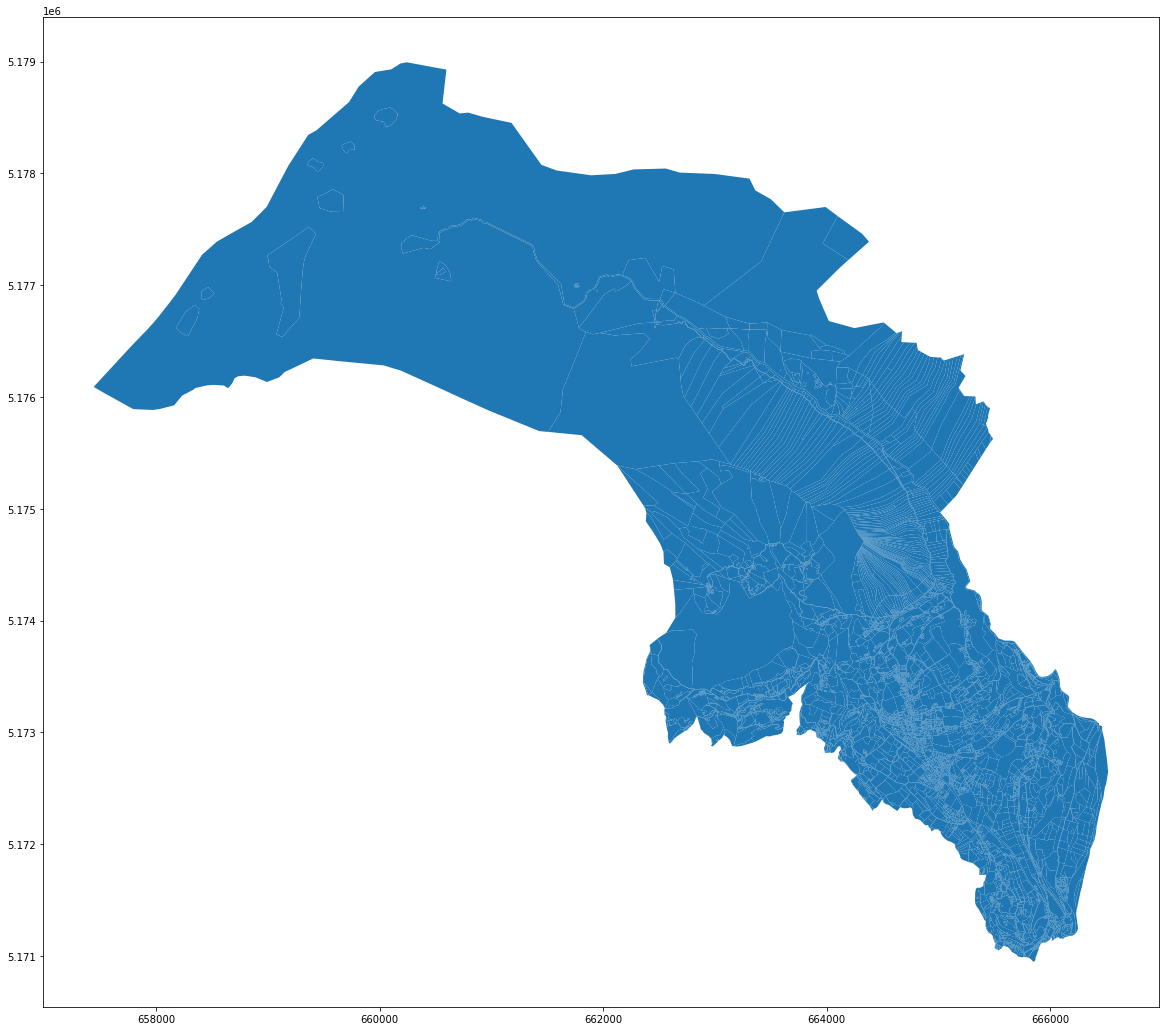

In [7]:
df_parcel.geometry.plot(figsize=(20, 20))

In [21]:
df_parcel.PT_CODE.nunique(), len(df_parcel)

(3731, 6129)

In [22]:
df_parcel.head()

,PT_TYPE,PT_CODE,PT_CCAT,PT_FABB,PT_PUB,geometry
0,P,1641,817,N,YES,"POLYGON ((662170.868 5177089.532, 662154.694 5..."
1,P,1648,817,N,YES,"POLYGON ((660080.211 5178417.456, 660055.049 5..."
2,P,1649,817,N,YES,"POLYGON ((659705.865 5178179.212, 659677.615 5..."
3,P,1650,817,N,YES,"POLYGON ((659445.223 5178018.365, 659429.868 5..."
4,P,1651,817,N,YES,"POLYGON ((659674.361 5177654.078, 659563.953 5..."


In [19]:
df_parcel.PT_TYPE.value_counts()

P    3731
C    2398
Name: PT_TYPE, dtype: int64

In [8]:
df_fix_points = gpd.read_file("../Downloads/cc817_shp/CC817_fix_points.shp")

In [9]:
df_fix_points.head()

,FP_CCAT,FP_CODE,FP_CCODE,FP_ATTEND,FP_MATER,FP_QUALPLA,FP_QUALORT,FP_Q_ORTO,FP_Q_ELLI,FP_GEOG_FI,FP_GEOG_LA,FP_UTM_E,FP_UTM_N,geometry
0,817,162,817162,4,None,None,None,612.49,662.91,46.693766,11.135651,663287.23,5173349.34,POINT (663287.230 5173349.340)
1,817,148,817148,4,None,None,None,525.51,575.74,46.686336,11.161602,665294.06,5172577.97,POINT (665294.060 5172577.970)
2,817,167,817167,5,None,None,None,0.00,0.00,46.688417,11.159824,665151.77,5172805.48,POINT (665151.770 5172805.480)
3,817,157,817157,4,None,None,None,735.13,785.53,46.697327,11.148572,664264.34,5173771.98,POINT (664264.340 5173771.980)
4,817,159,817159,4,None,None,None,1302.29,1352.80,46.700825,11.131475,662946.73,5174125.07,POINT (662946.730 5174125.070)


<AxesSubplot:>

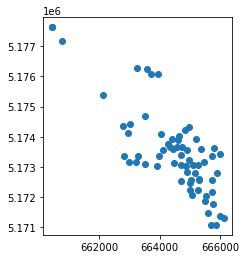

In [10]:
df_fix_points.geometry.plot()

In [12]:
df_grid = gpd.read_file("../Downloads/cc817_shp/CC817_grid.shp")

<AxesSubplot:>

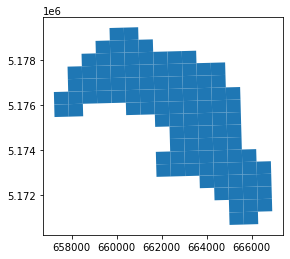

In [13]:
df_grid.geometry.plot()

In [14]:
df_symbols = gpd.read_file("../Downloads/cc817_shp/CC817_vl_symbols.shp")

<AxesSubplot:>

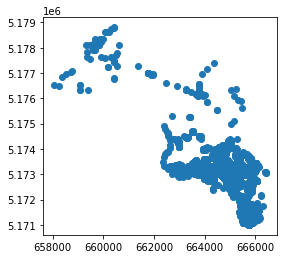

In [15]:
df_symbols.geometry.plot()

In [16]:
df_symbols.head()

,SM_TYPE,SM_ANGLE,SM_ANG_90,SM_NFR,SM_CCAT,SM_LEVEL,SM_PUB,geometry
0,53,86,176,None,817,SM,YES,POINT (662645.888 5174146.276)
1,53,235,325,None,817,SM,YES,POINT (665161.993 5175119.904)
2,56,158,248,None,817,SM,YES,POINT (659602.307 5177945.084)
3,56,170,260,None,817,SM,YES,POINT (666159.016 5173268.110)
4,53,252,342,None,817,SM,YES,POINT (663910.023 5176950.497)


In [1]:
from matplotlib import pyplot as plt
from prettymaps import *

/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/lucas/opt/anaconda3/envs/datascience/

CPU times: user 22.2 s, sys: 308 ms, total: 22.5 s
Wall time: 2min 8s


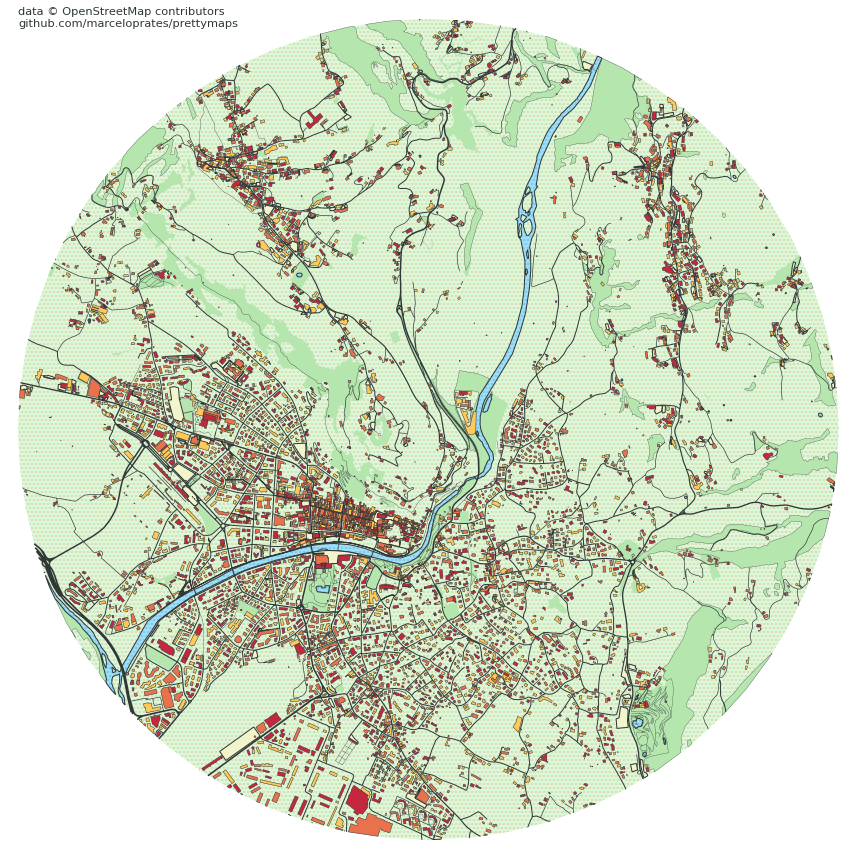

In [24]:
%%time
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

background_c = '#dbffd9' # '#b4e6ae' # '#F2F4CB'
forest_c = '#b4e6ae' # '#64B96A'
green_c = '#b4e6ae' # '#D0F1BF'

buildings_p = ['#FFC857', '#E9724C', '#C5283D'] # ['#FFC857', '#E9724C', '#C5283D']

layers = plot(
    (46.676214, 11.168985), 
    radius = 2_500,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|' + 
                                 'tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                # 'circle': False, 
                # 'dilate': 100
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#ffffff', 'ec': '#dadbc1', 'zorder': -1},
            'perimeter': {'fc': background_c, 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': green_c, 'ec': '#2F3737', 'lw': 0.01, 'zorder': 1},
            'forest': {'fc': forest_c, 'ec': '#2F3737', 'lw': 0.3, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': buildings_p, 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },

        osm_credit = {'color': '#2F3737'}
)
plt.tight_layout()
plt.savefig('dorf_tirol_meran.png', dpi=500)

https://nbviewer.org/github/marceloprates/prettymaps/blob/main/notebooks/examples.ipynb

/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/lucas/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/lucas/opt/anaconda3/envs/datascience/

CPU times: user 15.5 s, sys: 354 ms, total: 15.8 s
Wall time: 40.3 s


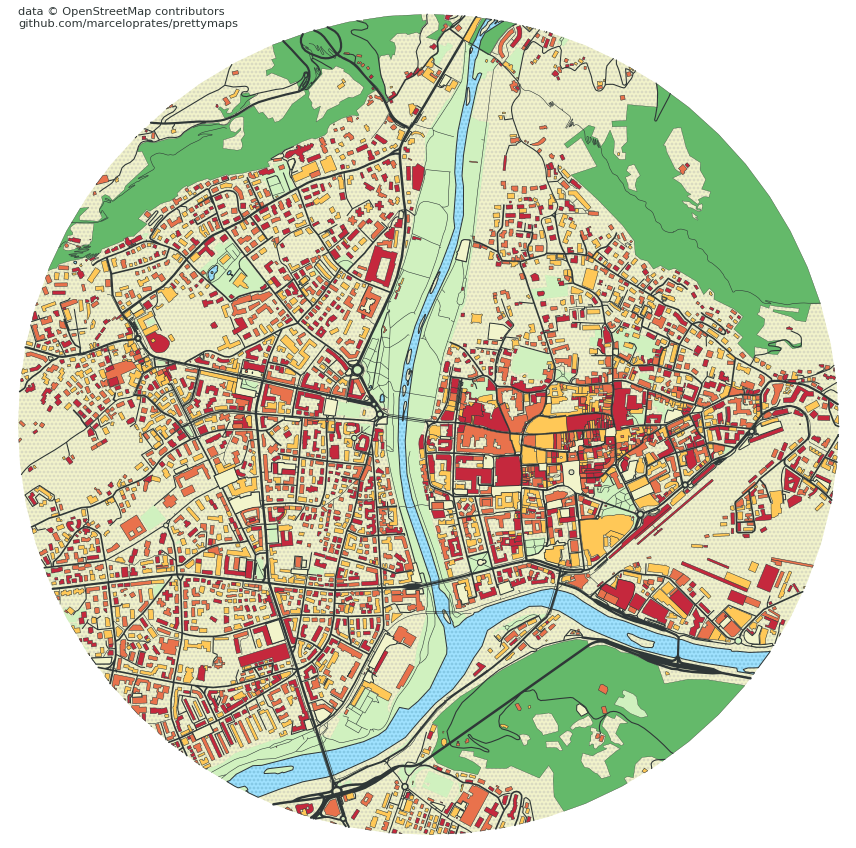

In [27]:
%%time
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

background_c = '#F2F4CB'
forest_c = '#64B96A'
green_c = '#D0F1BF'

buildings_p = ['#FFC857', '#E9724C', '#C5283D'] # ['#FFC857', '#E9724C', '#C5283D']

layers = plot(
    (46.500011, 11.348023), 
    radius = 1_500,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|' + 
                                 'tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                # 'circle': False, 
                # 'dilate': 100
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#ffffff', 'ec': '#dadbc1', 'zorder': -1},
            'perimeter': {'fc': background_c, 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': green_c, 'ec': '#2F3737', 'lw': 0.01, 'zorder': 1},
            'forest': {'fc': forest_c, 'ec': '#2F3737', 'lw': 0.3, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': buildings_p, 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },

        osm_credit = {'color': '#2F3737'}
)
plt.tight_layout()
plt.savefig('bozen.png', dpi=500)